<a href="https://colab.research.google.com/github/AlicePF43/TelecomX_2/blob/main/TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd


In [34]:
dados = pd.read_csv('/content/dados (1) (1).csv')

In [35]:
dados.head()

,ID_Cliente,Evasao,Genero,Idoso,Parceiro,Dependentes,Tempo_de_Contrato,Serviço_Telefônico,Multiplas_Linhas,Serviço_de_Internet,...,Backup_Online,Proteção_de_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_de_Contrato,Faturamento_Sem_Papel,Metodo_de_Pagamento,Custo_Mensal,Custo_Total
0,0002-ORFBO,0,Feminino,False,True,True,9,True,0,DSL,...,1,0,1,1,0,Anual,True,Mailed check,65.6,593.30
1,0003-MKNFE,0,Masculino,False,False,False,9,True,1,DSL,...,0,0,0,0,1,Mensal,False,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Masculino,False,False,False,4,True,0,Fiber optic,...,0,1,0,0,0,Mensal,True,Electronic check,73.9,280.85
3,0011-IGKFF,1,Masculino,True,True,False,13,True,0,Fiber optic,...,1,1,0,1,1,Mensal,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Feminino,True,True,False,3,True,0,Fiber optic,...,0,0,1,1,0,Mensal,True,Mailed check,83.9,267.40


In [36]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               7267 non-null   object 
 1   Evasao                   7267 non-null   int64  
 2   Genero                   7267 non-null   object 
 3   Idoso                    7267 non-null   bool   
 4   Parceiro                 7267 non-null   bool   
 5   Dependentes              7267 non-null   bool   
 6   Tempo_de_Contrato        7267 non-null   int64  
 7   Serviço_Telefônico       7267 non-null   bool   
 8   Multiplas_Linhas         7267 non-null   int64  
 9   Serviço_de_Internet      7267 non-null   object 
 10  Segurança_Online         7267 non-null   int64  
 11  Backup_Online            7267 non-null   int64  
 12  Proteção_de_Dispositivo  7267 non-null   int64  
 13  Suporte_Tecnico          7267 non-null   int64  
 14  Streaming_TV            

Remoção de Colunas Irrelevante

In [37]:
dados.drop('ID_Cliente', axis=1, inplace=True, errors='ignore')
dados.head()

,Evasao,Genero,Idoso,Parceiro,Dependentes,Tempo_de_Contrato,Serviço_Telefônico,Multiplas_Linhas,Serviço_de_Internet,Segurança_Online,Backup_Online,Proteção_de_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_de_Contrato,Faturamento_Sem_Papel,Metodo_de_Pagamento,Custo_Mensal,Custo_Total
0,0,Feminino,False,True,True,9,True,0,DSL,0,1,0,1,1,0,Anual,True,Mailed check,65.6,593.30
1,0,Masculino,False,False,False,9,True,1,DSL,0,0,0,0,0,1,Mensal,False,Mailed check,59.9,542.40
2,1,Masculino,False,False,False,4,True,0,Fiber optic,0,0,1,0,0,0,Mensal,True,Electronic check,73.9,280.85
3,1,Masculino,True,True,False,13,True,0,Fiber optic,0,1,1,0,1,1,Mensal,True,Electronic check,98.0,1237.85
4,1,Feminino,True,True,False,3,True,0,Fiber optic,0,0,0,1,1,0,Mensal,True,Mailed check,83.9,267.40


Identificar e Separar os Tipos de Colunas

In [38]:
# Identificar colunas categóricas (tipo 'object')
colunas_categoricas = dados.select_dtypes(include=['object']).columns
print("Colunas Categóricas a serem transformadas:")
print(colunas_categoricas)
print("-" * 30)

# Identificar colunas numéricas (que não serão transformadas agora)
colunas_numericas = dados.select_dtypes(include=['int64', 'float64', 'bool']).columns
print("Colunas Numéricas e Booleanas que serão mantidas:")
print(colunas_numericas)

Colunas Categóricas a serem transformadas:
Index(['Genero', 'Serviço_de_Internet', 'Tipo_de_Contrato',
       'Metodo_de_Pagamento'],
      dtype='object')
------------------------------
Colunas Numéricas e Booleanas que serão mantidas:
Index(['Evasao', 'Idoso', 'Parceiro', 'Dependentes', 'Tempo_de_Contrato',
       'Serviço_Telefônico', 'Multiplas_Linhas', 'Segurança_Online',
       'Backup_Online', 'Proteção_de_Dispositivo', 'Suporte_Tecnico',
       'Streaming_TV', 'Streaming_Filmes', 'Faturamento_Sem_Papel',
       'Custo_Mensal', 'Custo_Total'],
      dtype='object')


Aplicar o OneHotEncoder com ColumnTransformer

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [40]:
# Colunas categóricas a serem transformadas
colunas_categoricas = ['Genero', 'Serviço_de_Internet', 'Tipo_de_Contrato', 'Metodo_de_Pagamento']

# Colunas numéricas e booleanas que serão mantidas
colunas_numericas = ['Evasao', 'Idoso', 'Parceiro', 'Dependentes', 'Tempo_de_Contrato',
                     'Serviço_Telefônico', 'Multiplas_Linhas', 'Segurança_Online',
                     'Backup_Online', 'Proteção_de_Dispositivo', 'Suporte_Tecnico',
                     'Streaming_TV', 'Streaming_Filmes', 'Faturamento_Sem_Papel',
                     'Custo_Mensal', 'Custo_Total']

# Criando o transformador com OneHotEncoder (sem drop de categorias)
transformador = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False), colunas_categoricas)
    ],
    remainder='passthrough'  # mantém as colunas numéricas e booleanas
)

# Aplicando o transformador ao DataFrame 'dados'
dados_transformados = transformador.fit_transform(dados)

# Recuperando os nomes das novas colunas categóricas codificadas
nomes_colunas_ohe = transformador.named_transformers_['onehot'].get_feature_names_out(colunas_categoricas)

# Juntando os nomes das colunas categorizadas com as demais
novos_nomes_colunas = list(nomes_colunas_ohe) + colunas_numericas

# Criando o novo DataFrame final
dados_final = pd.DataFrame(dados_transformados, columns=novos_nomes_colunas)

# Visualizando as primeiras linhas
dados_final.head()


,Genero_Feminino,Genero_Masculino,Serviço_de_Internet_0,Serviço_de_Internet_DSL,Serviço_de_Internet_Fiber optic,Tipo_de_Contrato_Anual,Tipo_de_Contrato_Bienal,Tipo_de_Contrato_Mensal,Metodo_de_Pagamento_Bank transfer (automatic),Metodo_de_Pagamento_Credit card (automatic),...,Multiplas_Linhas,Segurança_Online,Backup_Online,Proteção_de_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Faturamento_Sem_Papel,Custo_Mensal,Custo_Total
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,1,0,True,65.6,593.3
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0,0,1,False,59.9,542.4
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,True,73.9,280.85
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,1,0,1,1,True,98.0,1237.85
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,1,1,0,True,83.9,267.4


Calcular proporções

In [41]:
# Contagem absoluta de cada classe
contagem = dados['Evasao'].value_counts()

# Proporção relativa (normalizada)
proporcao = dados['Evasao'].value_counts(normalize=True)

# Exibindo os resultados
print("Contagem de clientes por classe:")
print(contagem)
print("\nProporção de clientes por classe:")
print(proporcao)


Contagem de clientes por classe:
Evasao
0    5398
1    1869
Name: count, dtype: int64

Proporção de clientes por classe:
Evasao
0    0.74281
1    0.25719
Name: proportion, dtype: float64


Matriz de Correlação com Foco na Evasão

Matriz de Correlação com Foco na Evasão

Correlação com a variável Evasao:
Genero_Feminino                                  1.000000
Metodo_de_Pagamento_Bank transfer (automatic)    0.018361
Segurança_Online                                 0.016974
Custo_Mensal                                     0.013889
Backup_Online                                    0.013494
Streaming_Filmes                                 0.012475
Faturamento_Sem_Papel                            0.011273
Serviço_de_Internet_Fiber optic                  0.009572
Evasao                                           0.009555
Suporte_Tecnico                                  0.009112
Streaming_TV                                     0.008451
Multiplas_Linhas                                 0.007805
Tipo_de_Contrato_Bienal                          0.005449
Serviço_Telefônico                               0.005073
Parceiro                                         0.005007
Idoso                                            0.004288
Proteção_de_Dispositivo               

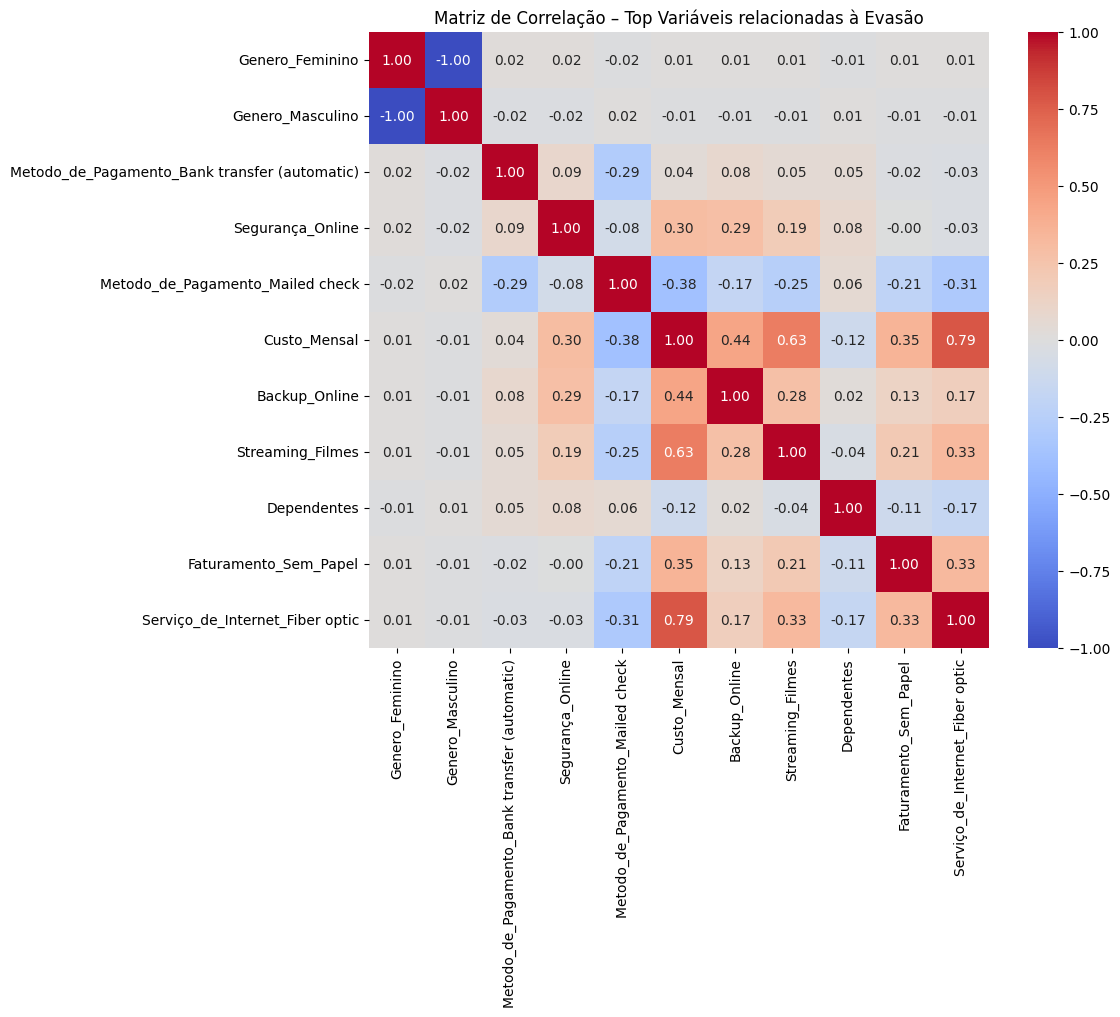

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert boolean columns to integers before calculating correlation
dados_final_numeric = dados_final.copy()
for col in dados_final_numeric.columns:
    if dados_final_numeric[col].dtype == 'bool':
        dados_final_numeric[col] = dados_final_numeric[col].astype(int)

# Calculando a matriz de correlação
correlacao = dados_final_numeric.corr()

# Ordenando as variáveis pela correlação com 'Evasao'
# Accessing the 'Evasao' column by its index (0) as it's the first column in the transformed DataFrame
correlacao_com_evasao = correlacao.iloc[:, 0].sort_values(ascending=False)


# Exibindo as maiores correlações positivas e negativas com evasão
print("Correlação com a variável Evasao:")
print(correlacao_com_evasao)

# Plotando um heatmap com as 10 variáveis mais correlacionadas com 'Evasao'
plt.figure(figsize=(10, 8))
# Adjusting to select the column by index for plotting as well
top_variaveis = correlacao_com_evasao.abs().sort_values(ascending=False).head(11).index
sns.heatmap(dados_final_numeric[top_variaveis].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação – Top Variáveis relacionadas à Evasão")
plt.show()

Análises Direcionadas – Boxplots e Scatter Plots
Boxplot: Tempo de Contrato × Evasão

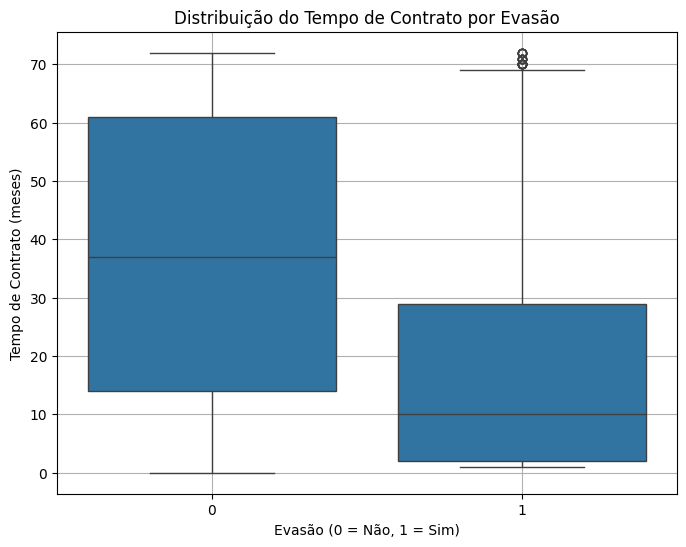

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasao', y='Tempo_de_Contrato', data=dados_final_numeric)
plt.title('Distribuição do Tempo de Contrato por Evasão')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Tempo de Contrato (meses)')
plt.grid(True)
plt.show()


Custo Total × Evasão

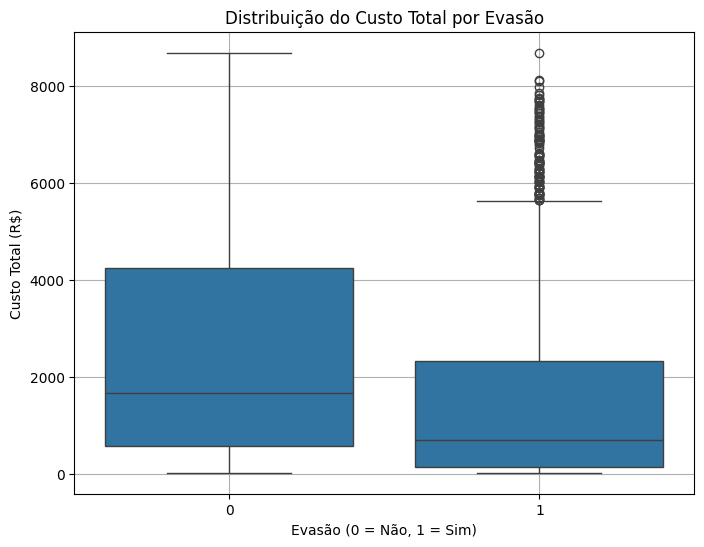

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasao', y='Custo_Total', data=dados_final_numeric)
plt.title('Distribuição do Custo Total por Evasão')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Custo Total (R$)')
plt.grid(True)
plt.show()


Aplicar SMOTE

In [45]:
# 1. Separating X (features) and y (target)
X = dados_final.drop('Evasao', axis=1)
y = dados_final['Evasao'].astype(int)  # ensure that y is as integer

# 2. Dividing between treino and teste with stratification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Aplicando o SMOTE apenas no conjunto de treino
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 4. Verificando a nova distribuição das classes
print("Distribuição após SMOTE (dados de treino):")
print(y_train_resampled.value_counts())

Distribuição após SMOTE (dados de treino):
Evasao
0    4318
1    4318
Name: count, dtype: int64


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


Padronização dos dados

In [47]:
scaler = StandardScaler()

# Ajusta e transforma os dados de treino
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Apenas transforma os dados de teste (sem resampling!)
X_test_scaled = scaler.transform(X_test)


 Treinamento de dois modelos

Regressão Logística

```
# Isto está formatado como código
```



In [48]:
#Regressão Logística
modelo_lr = LogisticRegression(random_state=42, max_iter=1000)
modelo_lr.fit(X_train_scaled, y_train_resampled)
y_pred_lr = modelo_lr.predict(X_test_scaled)


#Random Forest
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = modelo_rf.predict(X_test)



Avaliação dos modelos

In [49]:
#Regressão Logística
print(" Regressão Logística")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Random Forest
print(" Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



 Regressão Logística
[[794 286]
 [ 76 298]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1080
           1       0.51      0.80      0.62       374

    accuracy                           0.75      1454
   macro avg       0.71      0.77      0.72      1454
weighted avg       0.81      0.75      0.76      1454

 Random Forest
[[939 141]
 [185 189]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1080
           1       0.57      0.51      0.54       374

    accuracy                           0.78      1454
   macro avg       0.70      0.69      0.69      1454
weighted avg       0.77      0.78      0.77      1454



Regressão Logística – Coeficientes

In [50]:
import pandas as pd
import numpy as np

# Pegando os nomes das variáveis (colunas usadas no X)
variaveis = X.columns

# Pegando os coeficientes do modelo treinado
coeficientes = modelo_lr.coef_[0]

# Criando um DataFrame para facilitar a visualização
df_coef = pd.DataFrame({
    'Variável': variaveis,
    'Coeficiente': coeficientes
})

# Calculando o valor absoluto dos coeficientes para ordenar por importância
df_coef['Importancia_Absoluta'] = np.abs(df_coef['Coeficiente'])

# Ordenando pelas variáveis mais impactantes
df_coef = df_coef.sort_values(by='Importancia_Absoluta', ascending=False)

# Exibindo
print(df_coef.head(10))  # Top 10 variáveis mais impactantes

                           Variável  Coeficiente  Importancia_Absoluta
15                Tempo_de_Contrato    -1.486339              1.486339
25                     Custo_Mensal    -1.025580              1.025580
26                      Custo_Total     0.806552              0.806552
2             Serviço_de_Internet_0    -0.730658              0.730658
4   Serviço_de_Internet_Fiber optic     0.669528              0.669528
6           Tipo_de_Contrato_Bienal    -0.273432              0.273432
7           Tipo_de_Contrato_Mensal     0.271102              0.271102
22                     Streaming_TV     0.263406              0.263406
23                 Streaming_Filmes     0.251533              0.251533
24            Faturamento_Sem_Papel     0.187479              0.187479


Random Forest – Importância das Variáveis

In [51]:
# Pegando a importância das variáveis do Random Forest
importancias = modelo_rf.feature_importances_

# DataFrame com variáveis e suas importâncias
df_rf_importancia = pd.DataFrame({
    'Variável': X.columns,
    'Importância': importancias
})

# Ordenando pela importância
df_rf_importancia = df_rf_importancia.sort_values(by='Importância', ascending=False)

# Exibindo
print(df_rf_importancia.head(10))  # Top 10 mais importantes

                                Variável  Importância
26                           Custo_Total     0.117061
15                     Tempo_de_Contrato     0.107558
25                          Custo_Mensal     0.098741
7                Tipo_de_Contrato_Mensal     0.094383
10  Metodo_de_Pagamento_Electronic check     0.078780
24                 Faturamento_Sem_Papel     0.054675
4        Serviço_de_Internet_Fiber optic     0.047971
6                Tipo_de_Contrato_Bienal     0.042184
21                       Suporte_Tecnico     0.038965
18                      Segurança_Online     0.030511


Gráfico de barras:

/tmp/ipython-input-1881905809.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importância', y='Variável', data=df_rf_importancia.head(10), palette='viridis')


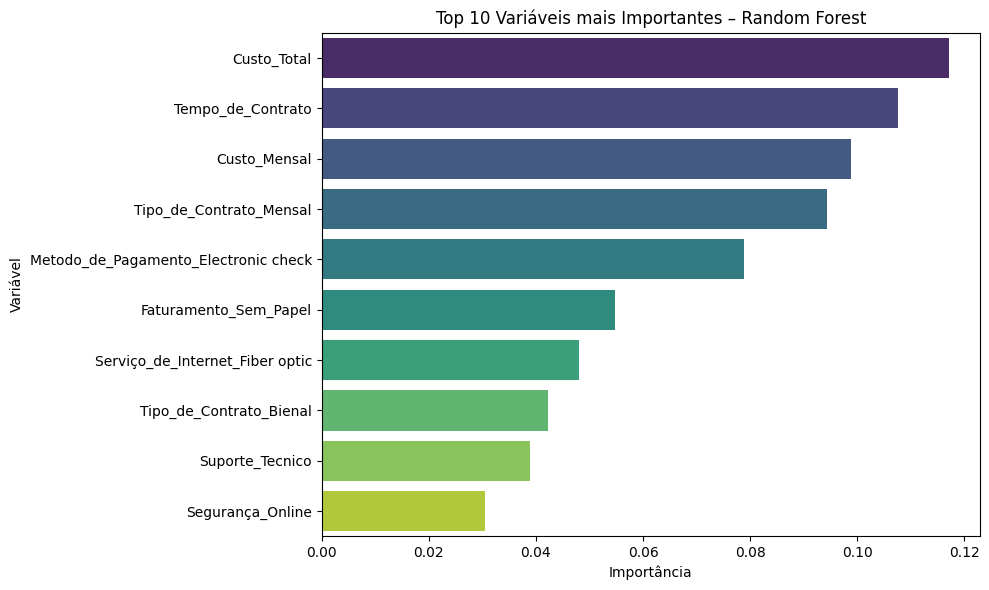

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Variável', data=df_rf_importancia.head(10), palette='viridis')
plt.title("Top 10 Variáveis mais Importantes – Random Forest")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()


In [53]:
!pip install fpdf

Relatório

In [54]:
from fpdf import FPDF

# Criar uma classe personalizada
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 14)
        self.cell(0, 10, 'Relatório de Fatores de Evasão - Telecom X', ln=True, align='C')
        self.ln(5)

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.set_text_color(0)
        self.cell(0, 10, title, ln=True)
        self.ln(2)

    def chapter_body(self, body):
        self.set_font('Arial', '', 11)
        self.set_text_color(50)
        self.multi_cell(0, 8, body)
        self.ln()

# Iniciar PDF
pdf = PDF()
pdf.add_page()

# Texto principal
texto = """
Modelos Utilizados:
- Random Forest: lida bem com dados categóricos e complexos.
- Regressão Logística: interpreta bem o impacto das variáveis.

Fatores de Evasão:

1. Custo Total:
   - Quanto maior, maior o risco de evasão.
   - Estratégia: programas de fidelidade para clientes com alto faturamento.

2. Tempo de Contrato:
   - Clientes antigos tendem a permanecer.
   - Estratégia: fidelizar logo nos primeiros meses.

3. Custo Mensal:
   - Custo alto indica engajamento.
   - Estratégia: oferecer benefícios exclusivos para manter esse grupo.

4. Tipo de Contrato:
   - Contrato mensal aumenta risco de churn.
   - Estratégia: incentivar migração para contratos longos.

5. Forma de Pagamento:
   - Electronic check associado à evasão.
   - Estratégia: estimular pagamento por débito automático ou cartão.

6. Fatura Sem Papel:
   - Pode indicar distanciamento do cliente.
   - Estratégia: aumentar engajamento digital.

7. Internet por Fibra:
   - Clientes com fibra mostram mais evasão.
   - Estratégia: monitorar performance técnica e agir rapidamente.

Conclusão:
Recomenda-se atuar nos fatores de risco com estratégias personalizadas de retenção. Clientes de alto valor, contratos mensais e formas de pagamento específicas devem ser foco prioritário.
"""

pdf.chapter_title("Análise das Variáveis Mais Relevantes")
pdf.chapter_body(texto)

# Salvar
pdf.output("/content/Relatorio_Evasao_TelecomX.pdf")
print("PDF gerado com sucesso: Relatorio_Evasao_TelecomX.pdf")


PDF gerado com sucesso: Relatorio_Evasao_TelecomX.pdf


Reutilizar o Modelo Treinado em Novos Dados

In [55]:
import joblib

# Supondo que você tenha um modelo chamado rf_model e um scaler chamado scaler
joblib.dump(modelo_rf, 'modelo_random_forest.pkl')
joblib.dump(scaler, 'scaler_padronizacao.pkl')

['scaler_padronizacao.pkl']

In [56]:
# Create a placeholder DataFrame with the same columns as your training data (X)
# Replace this with your actual new data when you have it
novos_dados = X.head(5)

# Carregar modelo e scaler
modelo_carregado = joblib.load('modelo_random_forest.pkl')
scaler_carregado = joblib.load('scaler_padronizacao.pkl')

# Usar em novos dados:
novos_dados_padronizados = scaler_carregado.transform(novos_dados)
predicoes = modelo_carregado.predict(novos_dados_padronizados)

print("Predições para os novos dados:")
print(predicoes)

Predições para os novos dados:
[0 0 1 1 1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [57]:
# Create a placeholder DataFrame with the same columns as your training data (X)
# Replace this with your actual new data when you have it
novos_dados = X.head(5)

# Carregar modelo e scaler
modelo_carregado = joblib.load('modelo_random_forest.pkl')
scaler_carregado = joblib.load('scaler_padronizacao.pkl')

# Usar em novos dados:
novos_dados_padronizados = scaler_carregado.transform(novos_dados)
predicoes = modelo_carregado.predict(novos_dados_padronizados)

print("Predições para os novos dados:")
print(predicoes)

Predições para os novos dados:
[0 0 1 1 1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
